In [33]:
!curl -s heetps://course.fast.ai/setup/setup/colab | bash

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
from google.colab import drive

In [36]:
from fastai.vision import *

In [37]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [39]:
#(Path(root_path)/'Footwear').mkdir(parents=True, exist_ok=True)

In [40]:
proj_path = 'gdrive/My Drive/AI_Projects/Footwear/'

In [41]:
#make folder names 
folders = ['shoes','wedges','boots','heels','sandals','ballet_flat','slippers']

In [42]:
#create all folders in /Footwear
#for i in folders:
 #path = Path(proj_path)
 #dest = (path/i).mkdir(parents=True, exist_ok=True)

In [43]:
#save fastai path 
p_path = Path(proj_path)


In [44]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [45]:
data.classes

['ballet_flat', 'boots', 'heels', 'sandals', 'shoes', 'slippers', 'wedges']

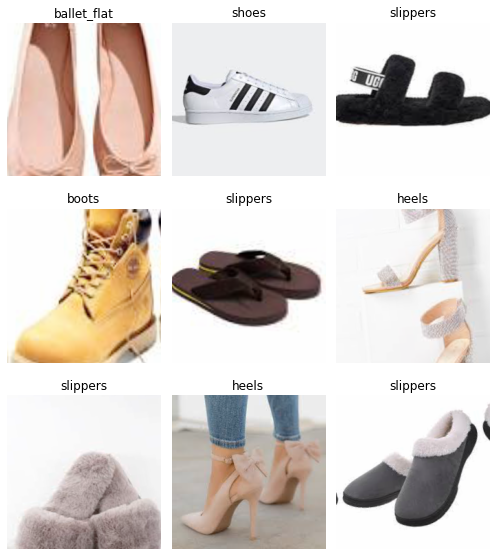

In [46]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [47]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ballet_flat', 'boots', 'heels', 'sandals', 'shoes', 'slippers', 'wedges'],
 7,
 432,
 108)

In [48]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [49]:

# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.185159,2.343189,0.740741,00:04
1,2.572880,1.461915,0.518519,00:04
2,2.028846,1.019754,0.314815,00:04
3,1.662365,0.923754,0.250000,00:04
4,1.395221,0.963822,0.287037,00:04
5,1.196669,0.966809,0.277778,00:04
6,1.057815,0.964821,0.268519,00:04
7,0.942003,0.960124,0.287037,00:04


In [50]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Footwear/models/model1_34.pth')

In [51]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


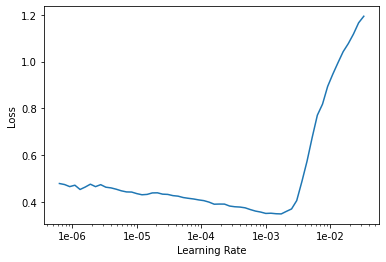

In [52]:

#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [53]:
#considering the above plot, we choose a learning rate that is bigger in the beginning and smaller later 
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.422736,0.851641,0.259259,00:04
1,0.410851,0.915790,0.296296,00:04
2,0.345862,0.908177,0.287037,00:04


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


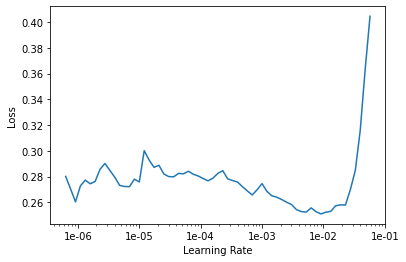

In [54]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.save('model2_34')

In [56]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

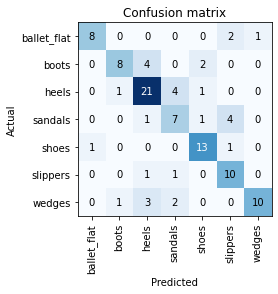

In [57]:

#plot results of model on validation set 
interp.plot_confusion_matrix()

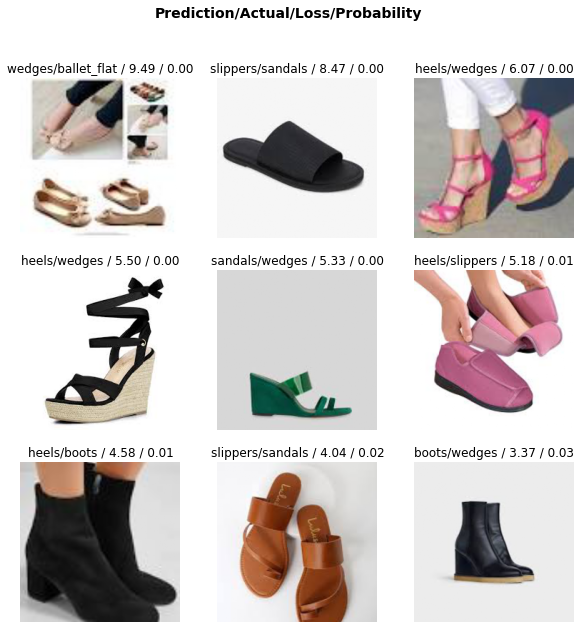

In [58]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

In [59]:
#!pip install "torch==1.4" "torchvision==0.5.0"

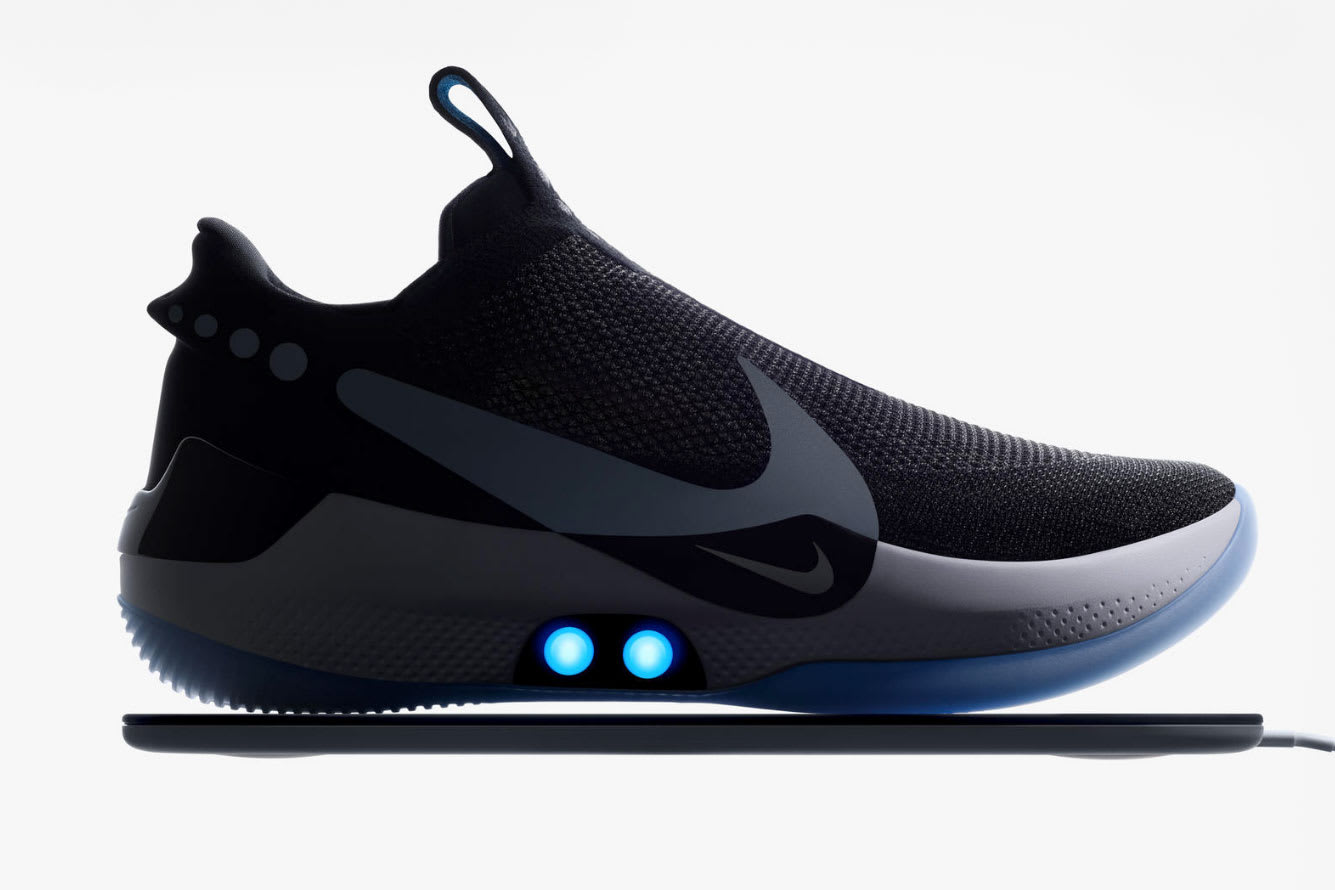

In [60]:
#Now we test 
img_shoes = open_image(Path(root_path)/'Footwear_valid'/'shoes.jpg')
img_shoes


In [61]:
pred_class,pred_idx,outputs = learn.predict(img_shoes)
pred_class
#['ballet_flat', 'boots', 'heels', 'sandals', 'shoes', 'slippers', 'wedges']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Category tensor(4)

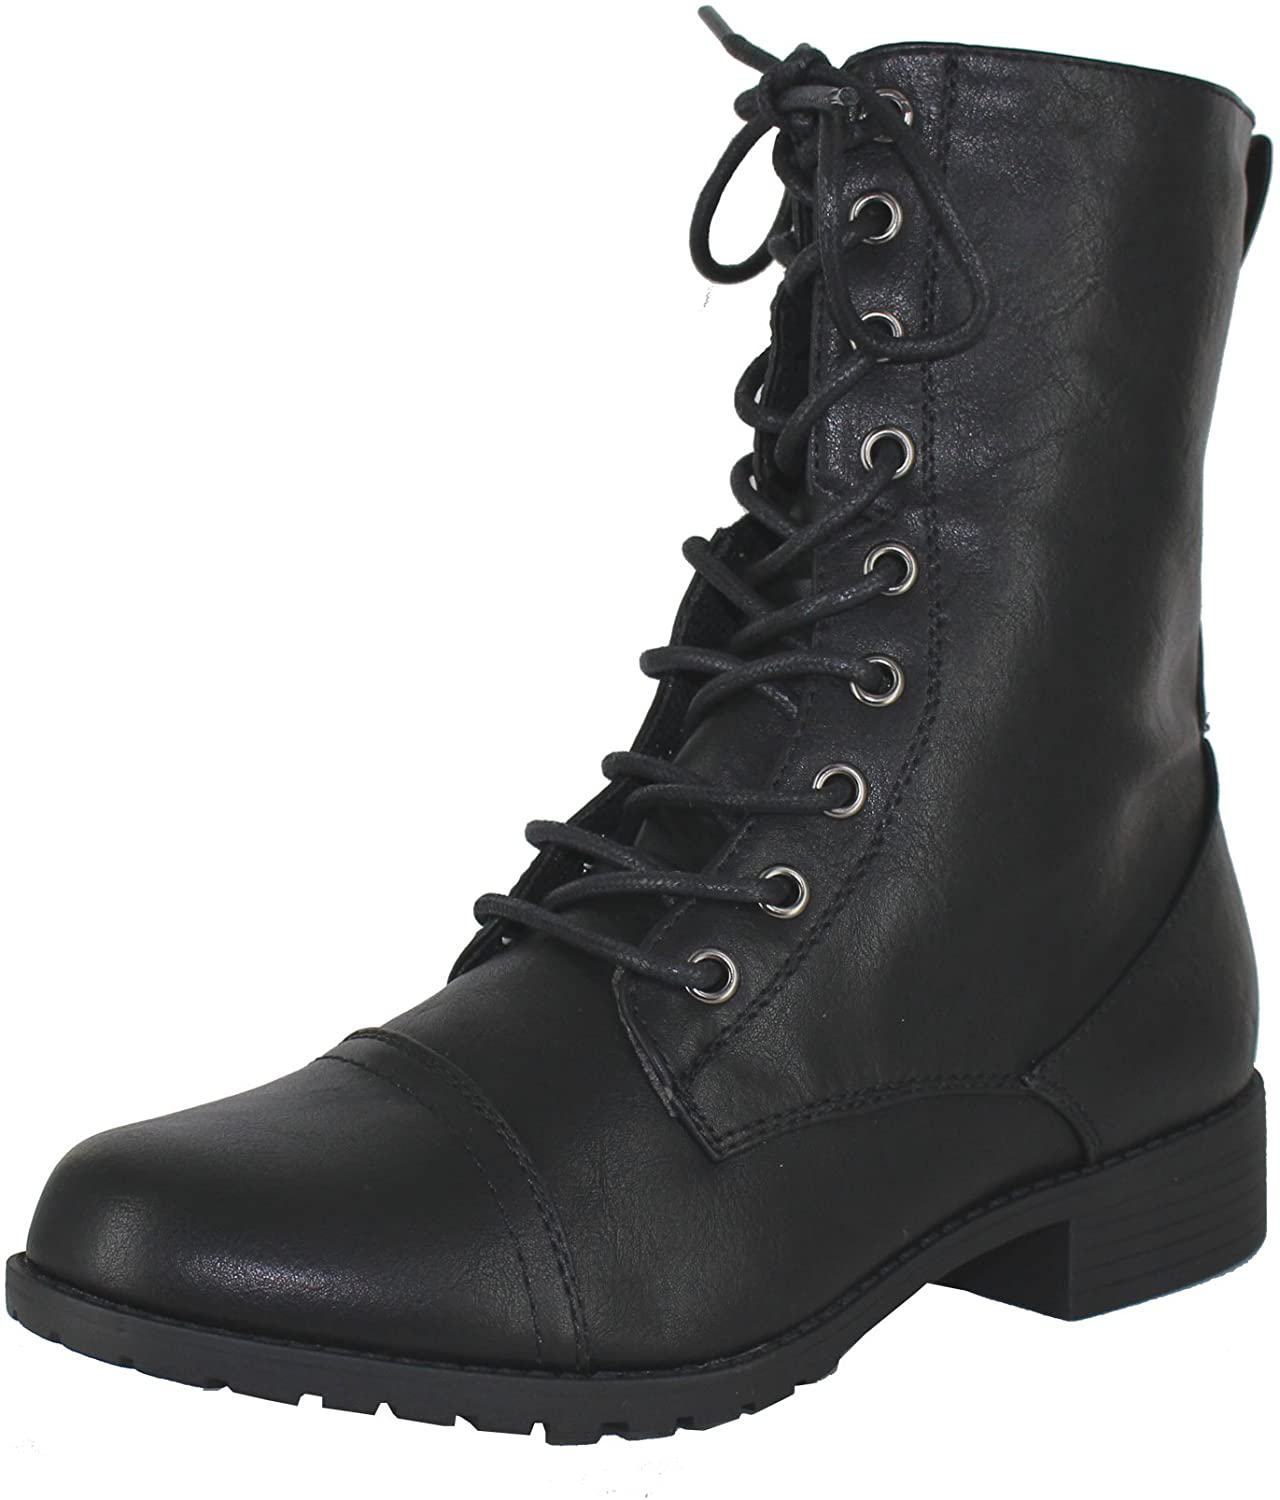

In [62]:
img_boots = open_image(Path(root_path)/'Footwear_valid'/'boot_val.jpg')
img_boots

In [63]:
pred_class,pred_idx,outputs = learn.predict(img_boots)
pred_class
#['ballet_flat', 'boots', 'heels', 'sandals', 'shoes', 'slippers', 'wedges']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Category tensor(1)